In [1]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

import jax

from src.simulate_trace import MakeTrace, apply_noise, GaussianAmplitude, PolynomialPhase, MultiPulse, RandomPhase

In [ ]:
# real fields issues
# classical running but not converging
# general not running -> missing methods, also wrong population shape (because of wrong mro -> create initial stuff is not overwritten)
#       -> works now for frog DifferentialEvolution

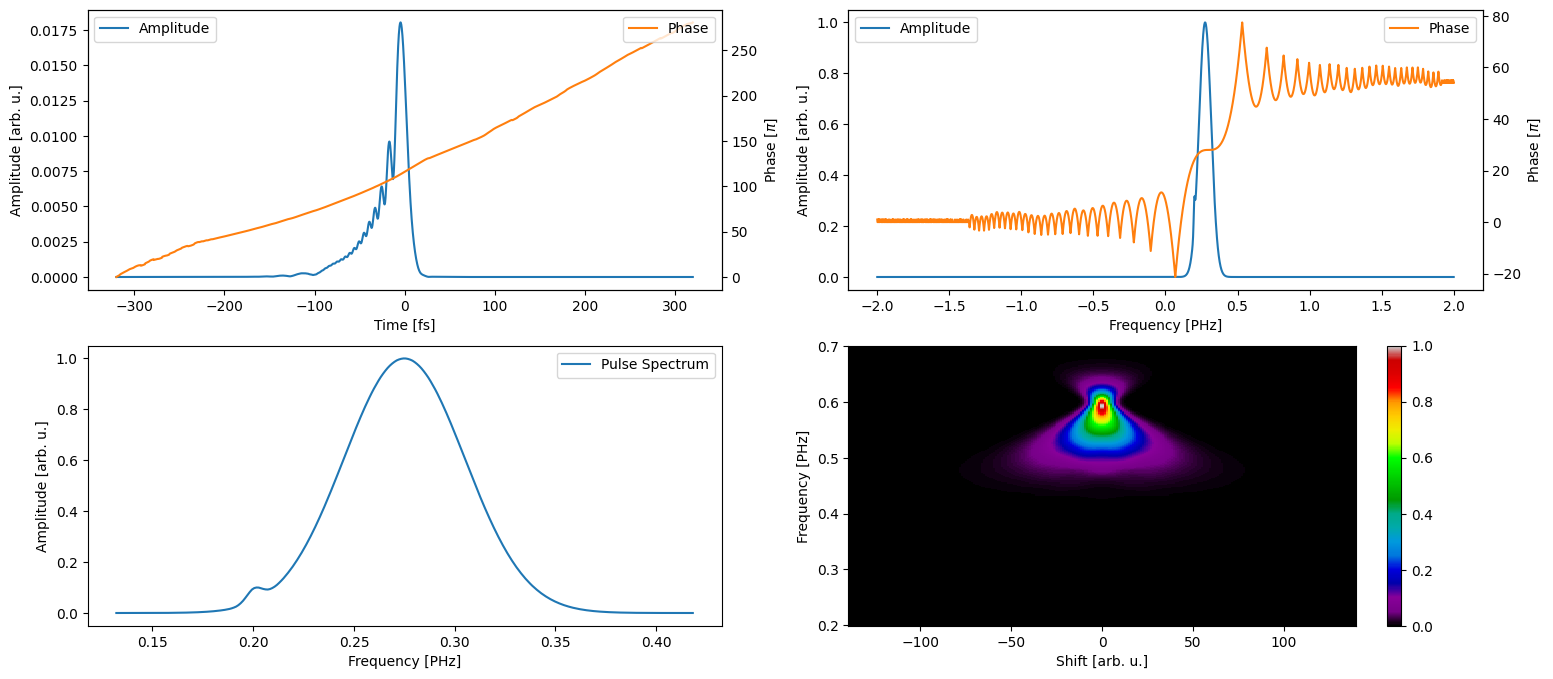

In [8]:

pulse_maker = MakeTrace(N=128*20, Delta_f=2)

central_f = 0.275
phase = PolynomialPhase(0.3, (0,0,0,50))
amp = GaussianAmplitude((1,0.1), (0.275,0.2), (0.1,0.01))
time_inp, pulse_t_inp, frequency_inp, pulse_f_inp = pulse_maker.generate_pulse((amp, phase))


input_pulses = pulse_maker.pulses



central_f = 0.4
phase = PolynomialPhase(central_frequency = central_f, coefficients = np.array([0, 0, -250]))
amp = GaussianAmplitude(central_frequency = central_f, amplitude = 1.0, fwhm = 0.05)
_, _, frequency_gate, pulse_f_gate = pulse_maker.generate_pulse((amp, phase))


delay, frequency, trace, spectra=pulse_maker.generate_frog(time_inp, frequency_inp, pulse_t_inp, pulse_f_inp, "shg", cross_correlation=False,
                                                          gate=(frequency_gate, pulse_f_gate), real_fields=True, interpolate_fft_conform=False,
                                                          N=128*2, scale_time_range=1.5, plot_stuff=True, cut_off_val=0.0001, frequency_range=(0.2,0.7))

In [3]:
#from src.real_fields.frog.classical_algorithms_frog_real_fields import COPRA
from src.real_fields.frog.general_algorithms_frog_real_fields import DifferentialEvolution

In [12]:
de = DifferentialEvolution(delay, frequency, trace, "shg", cross_correlation=False, f_range_fields=(0.1,0.8))

population = de.create_initial_population(50, "continuous", "continuous")

final_result = de.run(population, 100)

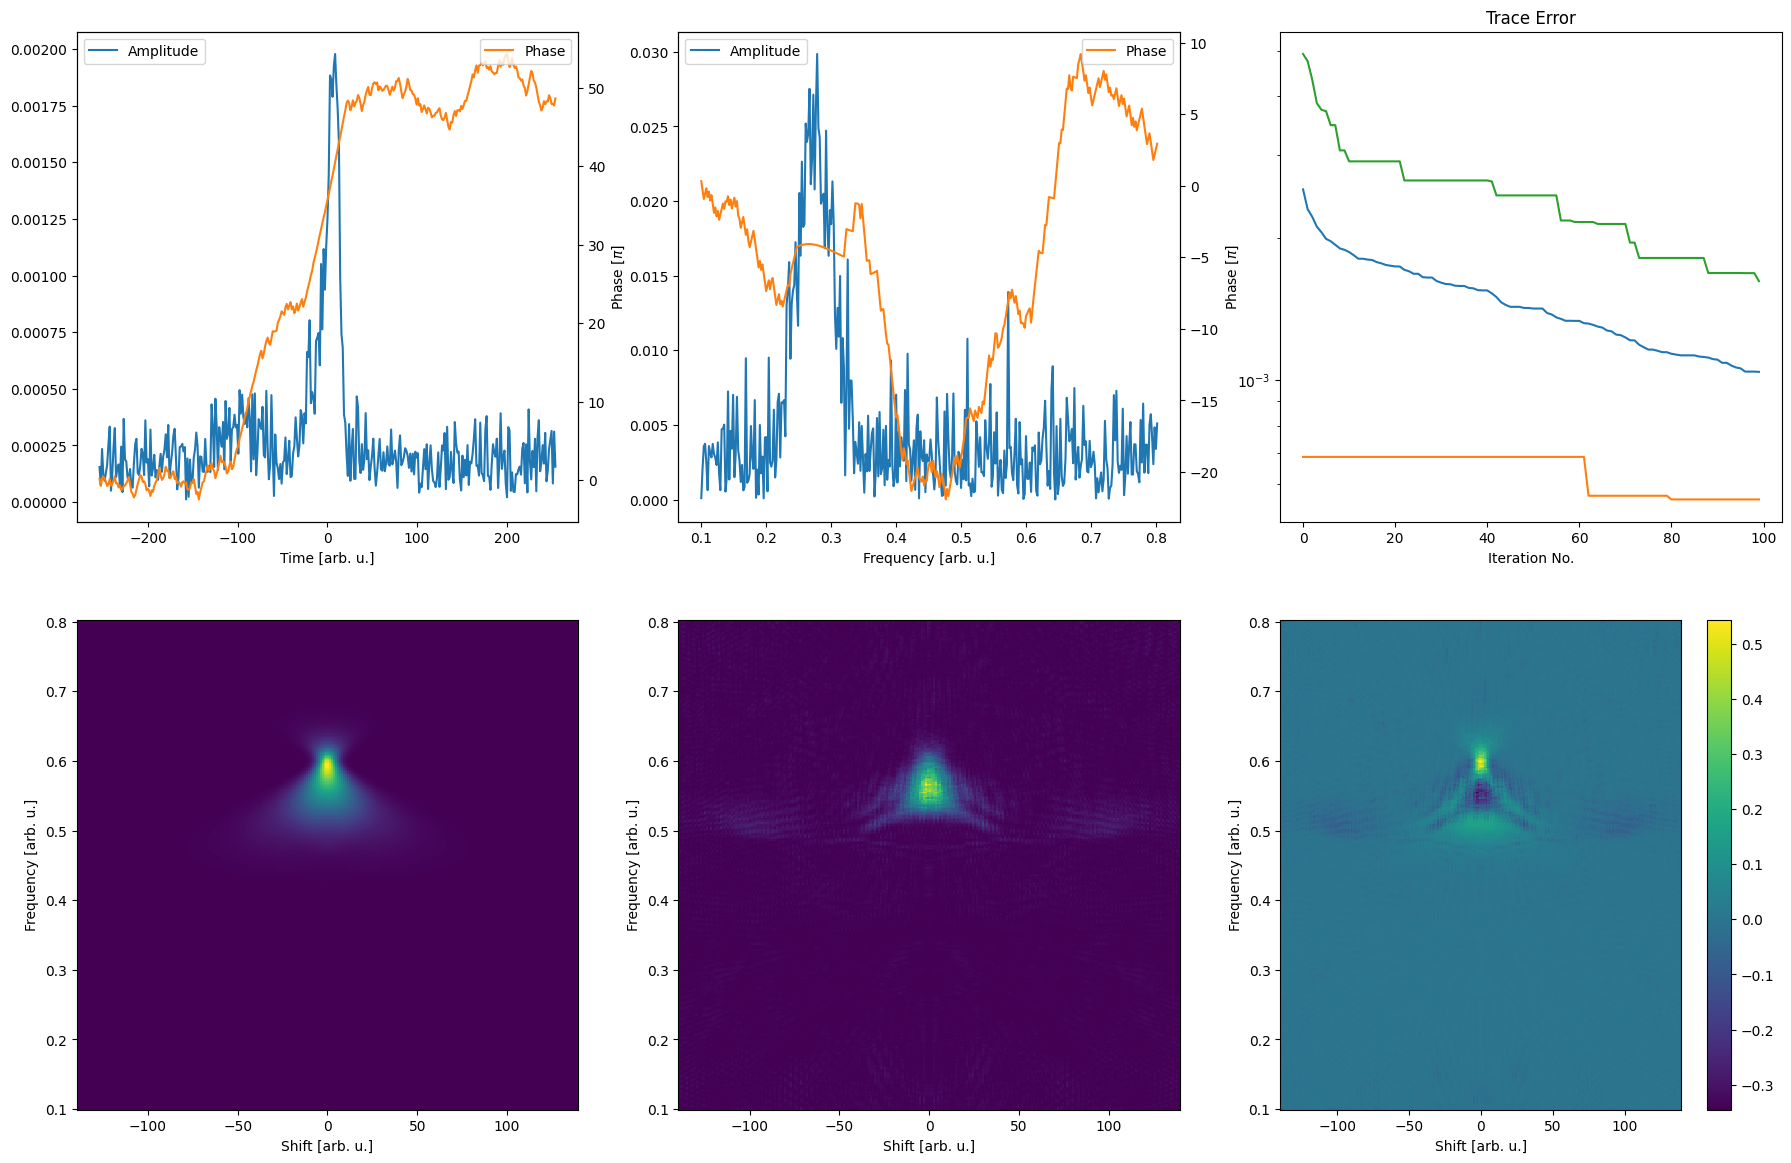

In [13]:
de.plot_results(final_result)